<a href="https://colab.research.google.com/github/zzickso/CNN/blob/main/Lec04_01_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Codes are adapted from "https://github.com/yunjey/pytorch-tutorial"

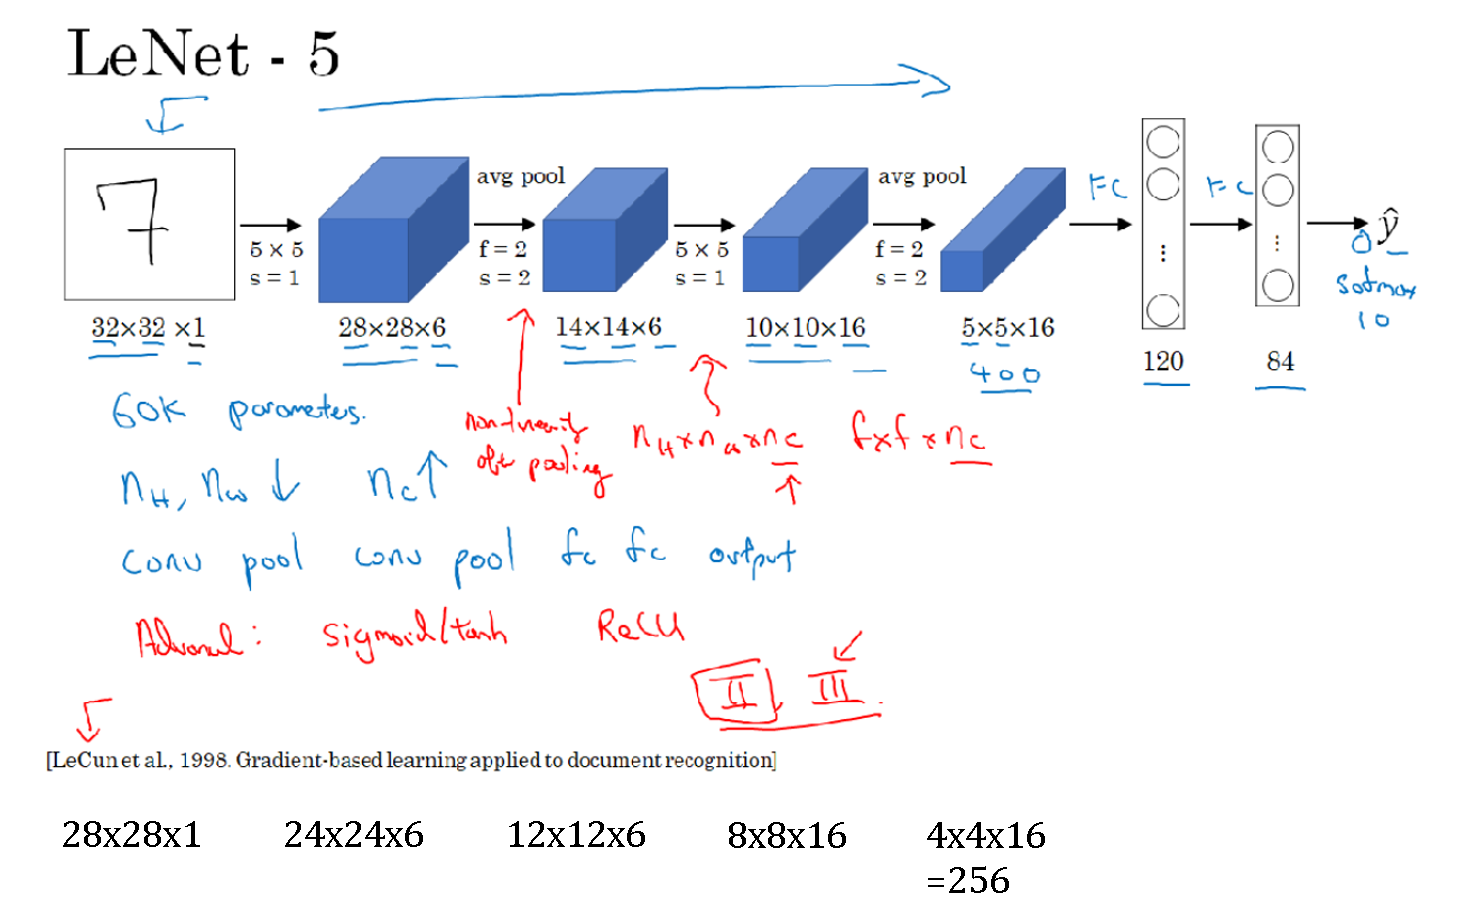

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/ColabNotebooks/Lecture/Pytorch/Codes'

/content/drive/MyDrive/ColabNotebooks/Lecture/Pytorch/Codes


In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [ ]:
# Data transform & augmentation

# transform_train = transforms.Compose([
#     transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
# ])

transform_train = transforms.Compose([   
    transforms.ToTensor(),    
])

transform_test = transforms.Compose([
    transforms.ToTensor(),    
])

In [ ]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True, 
                                           transform=transform_train,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False, 
                                          transform=transform_test)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
## LeNet-5 for MNIST (28*28*1 input)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1),
            #nn.BatchNorm2d(6),
            #nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1),
            #nn.BatchNorm2d(16),
            #nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(4*4*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

model = ConvNet(num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)      
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2886
Epoch [1/5], Step [200/600], Loss: 0.2655
Epoch [1/5], Step [300/600], Loss: 0.1630
Epoch [1/5], Step [400/600], Loss: 0.2373
Epoch [1/5], Step [500/600], Loss: 0.1903
Epoch [1/5], Step [600/600], Loss: 0.0784
Epoch [2/5], Step [100/600], Loss: 0.0730
Epoch [2/5], Step [200/600], Loss: 0.0541
Epoch [2/5], Step [300/600], Loss: 0.0801
Epoch [2/5], Step [400/600], Loss: 0.0609
Epoch [2/5], Step [500/600], Loss: 0.0323
Epoch [2/5], Step [600/600], Loss: 0.2111
Epoch [3/5], Step [100/600], Loss: 0.0376
Epoch [3/5], Step [200/600], Loss: 0.0166
Epoch [3/5], Step [300/600], Loss: 0.1051
Epoch [3/5], Step [400/600], Loss: 0.0832
Epoch [3/5], Step [500/600], Loss: 0.0876
Epoch [3/5], Step [600/600], Loss: 0.0697
Epoch [4/5], Step [100/600], Loss: 0.0880
Epoch [4/5], Step [200/600], Loss: 0.0764
Epoch [4/5], Step [300/600], Loss: 0.1231
Epoch [4/5], Step [400/600], Loss: 0.0123
Epoch [4/5], Step [500/600], Loss: 0.1028
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.11 %


In [ ]:
# Save the model checkpoint
!mkdir './saveModel'
#torch.save(model, './saveModel/LeNet5.ckpt')
torch.save(model.state_dict(), './saveModel/LeNet5.ckpt')

mkdir: cannot create directory ‘./saveModel’: File exists


In [ ]:
# Load the weight from the checkpoint
model.load_state_dict(torch.load('./saveModel/LeNet5.ckpt'))

<All keys matched successfully>

In [ ]:
# Test the model again using the saved weight file
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.11 %
